In [ ]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
import tensorflow
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [ ]:
import os
import pandas as pd

In [ ]:
# Import the data and remove rows containing NAN values
df = pd.read_csv("Reliance_stock_dataset.csv")

In [ ]:
# The dropna() method removes the rows that contains NULL values.
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,08-06-2015,453.399994,455.000000,441.549988,442.725006,425.550629,4958862.0
1,09-06-2015,441.774994,445.325012,438.674988,441.850006,424.709564,4184606.0
2,10-06-2015,443.000000,454.950012,442.500000,452.899994,435.330933,6176034.0
3,11-06-2015,453.000000,454.750000,436.825012,438.575012,421.561676,6709574.0
4,12-06-2015,439.500000,446.350006,439.125000,444.924988,427.665283,9849112.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1224,01-06-2020,1480.0,1538.349976,1475.949951,1520.349976,1520.349976,18434012.0
1225,02-06-2020,1526.0,1540.000000,1520.800049,1535.699951,1535.699951,10224049.0
1226,03-06-2020,1545.0,1560.000000,1533.349976,1541.650024,1541.650024,11713461.0
1227,04-06-2020,1544.0,1589.500000,1541.000000,1579.800049,1579.800049,15784379.0
1228,05-06-2020,1595.0,1618.000000,1573.699951,1581.699951,1581.699951,15246965.0


In [ ]:
df_close = df['Close']

In [ ]:
df_close.shape

(1228,)

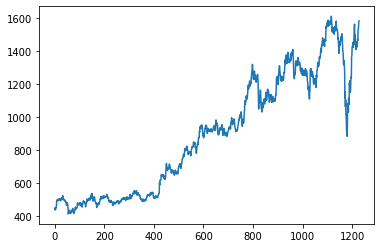

In [ ]:
plt.plot(df_close)

In [ ]:
# we apply MinMax Scaler to transform our values between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close.shape

(1228, 1)

In [ ]:
df_close

array([[0.02338571],
       [0.0226536 ],
       [0.0318991 ],
       ...,
       [0.94285362],
       [0.97477365],
       [0.97636329]])

In [ ]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data  = df_close[0:training_size,:], df_close[training_size:len(df_close),  :1]

In [ ]:
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [],[]
  for i in range(len(dataset) - time_step -1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 15s 470ms/step - loss: 0.0507 - val_loss: 0.0290
Epoch 2/100
13/13 [==============================] - 5s 391ms/step - loss: 0.0086 - val_loss: 0.0099
Epoch 3/100
13/13 [==============================] - 6s 466ms/step - loss: 0.0026 - val_loss: 0.0104
Epoch 4/100
13/13 [==============================] - 5s 393ms/step - loss: 0.0014 - val_loss: 0.0097
Epoch 5/100
13/13 [==============================] - 5s 388ms/step - loss: 0.0011 - val_loss: 0.0100
Epoch 6/100
13/13 [==============================] - 5s 388ms/step - loss: 0.0010 - val_loss: 0.0092
Epoch 7/100
13/13 [==============================] - 5s 392ms/step - loss: 9.8931e-04 - val_loss: 0.0091
Epoch 8/100
13/13 [==============================] - 5s 389ms/step - loss: 0.0010 - val_loss: 0.0089
Epoch 9/100
13/13 [==============================] - 5s 386ms/step - loss: 9.5710e-04 - val_loss: 0.0091
Epoch 10/100
13/13 [==============================] - 5s 390ms/step - loss: 9.4081

In [ ]:
# Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# Calculate LSTM performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

798.7395949745589

In [ ]:
# Test Data LSTM
math.sqrt(mean_squared_error(y_test, test_predict))

1315.032287936533

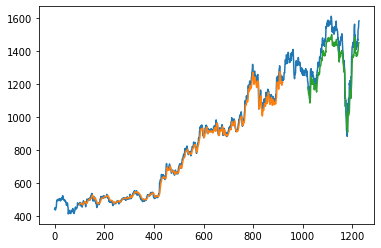

In [ ]:
# Plotting

# Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


**Predicting the next 30 days Stock Price**

In [ ]:
len(test_data), x_test.shape

(307, (206, 100, 1))

In [ ]:
x_input = test_data[207:].reshape(1,-1)

In [ ]:
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.88928616]
101
1 day input [0.94816663 0.9478738  0.94456879 0.93260407 0.92796036 0.939716
 0.97577765 0.93507229 0.93636921 0.93590899 0.93047045 0.92603602
 0.91348555 0.88436843 0.89114567 0.8609409  0.83408293 0.81220327
 0.84642422 0.86491522 0.87269654 0.85249028 0.8541218  0.86847118
 0.88315526 0.88637653 0.89763007 0.88980697 0.88072882 0.91118463
 0.8962495  0.8619449  0.83805724 0.8176418  0.81283079 0.76463703
 0.75417831 0.7765181  0.77388248 0.74999482 0.71640139 0.5851654
 0.6181313  0.5423683  0.57776065 0.50279251 0.49634993 0.46330038
 0.42079615 0.50467508 0.39264125 0.44229929 0.55847473 0.54504569
 0.54454369 0.51513375 0.5848307  0.55696863 0.55445854 0.6620997
 0.65042781 0.67368794 0.64791772 0.61503546 0.63026342 0.67707661
 0.69364326 0.6882465  0.79387957 0.7999875  0.83855924 0.84922714
 0.84788844 0.84688434 0.86803608 0.84250843 0.86360165 0.86368529
 0.90198096 0.9474387  0.95987202 0.87902192 0.90503482 0.85441462
 0.87403524 0.85843081 0.83178201 0.8

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
df3 = df_close.tolist()
df3.extend(lst_output)

In [ ]:
len(df_close)

1228

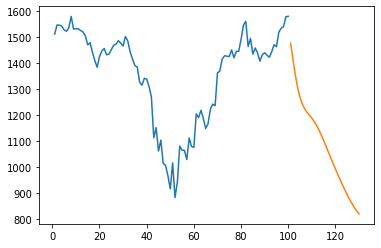

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df_close[1128:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))